<a href="https://colab.research.google.com/github/danyquiteque/Prova_1/blob/main/Ex3_cosin_plus_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
import csv
import pandas as pd

%matplotlib inline

In [ ]:
# Reset pseudo random generator to a known value so that results are reproducible.
np.random.seed(42)

N = 1000

f0 = 1000
X = np.linspace(0,1,N)

y = 2.1*np.cos(2*np.pi*f0*X) - 4.23*np.sin(2*np.pi*2*f0*X) + 1.45*np.cos(2*np.pi*3*f0*X)
    
y = y + 0.5*np.random.randn(N,)

X = X.reshape(N,1)
y = y.reshape(N,1)

In [ ]:
f = open("/content/cosine_plus_line.csv", 'w', newline='')
writer = csv.writer(f, delimiter=',')
for i in range(0,N):
    writer.writerow((X[i][0], y[i][0]))
f.close()

In [ ]:
df = pd.read_csv('/content/cosine_plus_line.csv', header=None)

X = df[0].to_numpy()
y = df[1].to_numpy()
           
X = X.reshape(len(X),1)
y = y.reshape(len(X),1)

print(X.shape)
print(y.shape)

(1000, 1)
(1000, 1)


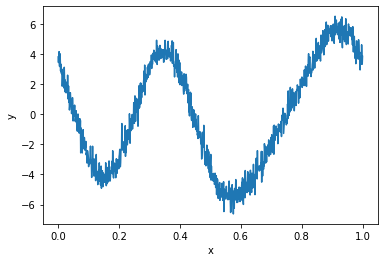

In [ ]:
plt.plot(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
degrees = range(1, 26)

# Holdout cross-validation (70/30%)

In [ ]:
include_bias = True

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

mean_vec_val = []
mean_vec_train = []
for d in degrees:
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    poly_reg.fit(x_train, y_train)
    
    y_train_predict = poly_reg.predict(x_train)
    y_val_predict = poly_reg.predict(x_val)
    
    mean_vec_val.append(mean_squared_error(y_val, y_val_predict))
    mean_vec_train.append(mean_squared_error(y_train, y_train_predict))

tamanho conjunto de treinamento: 700
tamanho conjunto de validação: 300


In [ ]:
for d in range(0, len(degrees)):
    print('degree: %d - error val: %1.2f - error train: %1.2f' % (degrees[d], mean_vec_val[d], mean_vec_train[d]) )

degree: 1 - error val: 11.14 - error train: 11.27
degree: 2 - error val: 8.19 - error train: 9.13
degree: 3 - error val: 7.47 - error train: 7.69
degree: 4 - error val: 7.47 - error train: 7.69
degree: 5 - error val: 2.03 - error train: 1.93
degree: 6 - error val: 1.73 - error train: 1.69
degree: 7 - error val: 1.00 - error train: 0.86
degree: 8 - error val: 0.45 - error train: 0.37
degree: 9 - error val: 0.43 - error train: 0.34
degree: 10 - error val: 0.27 - error train: 0.23
degree: 11 - error val: 0.27 - error train: 0.23
degree: 12 - error val: 0.26 - error train: 0.23
degree: 13 - error val: 0.27 - error train: 0.23
degree: 14 - error val: 0.26 - error train: 0.22
degree: 15 - error val: 0.27 - error train: 0.22
degree: 16 - error val: 0.27 - error train: 0.22
degree: 17 - error val: 0.27 - error train: 0.22
degree: 18 - error val: 0.27 - error train: 0.22
degree: 19 - error val: 0.27 - error train: 0.22
degree: 20 - error val: 0.27 - error train: 0.22
degree: 21 - error val: 0.2

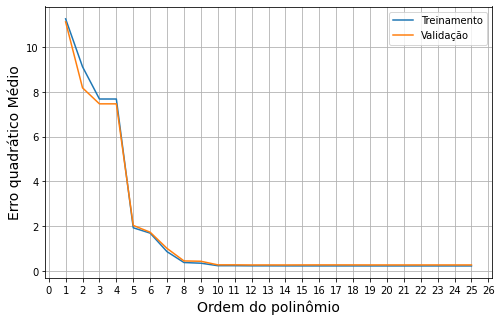

In [ ]:
# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(degrees, mean_vec_train,  label='Treinamento')
plt.plot(degrees, mean_vec_val,  label='Validação')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, len(degrees)+2, 1))
plt.legend()
plt.grid()
#Show the plot.
plt.show()

# k-fold cross-validation (k=10)

In [ ]:
# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True)

include_bias = True
mean_vec = []
std_vec = []
for d in degrees:
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    lin_scores = cross_val_score(poly_reg, X, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = -lin_scores
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

In [ ]:
for d in range(0, len(degrees)):
    print('degree: %d - error: %1.2f - std: %1.2f' % (degrees[d], mean_vec[d], std_vec[d]) )

degree: 1 - error: 11.25 - std: 0.95
degree: 2 - error: 8.89 - std: 0.67
degree: 3 - error: 7.66 - std: 0.75
degree: 4 - error: 7.71 - std: 0.56
degree: 5 - error: 1.99 - std: 0.13
degree: 6 - error: 1.73 - std: 0.14
degree: 7 - error: 0.91 - std: 0.09
degree: 8 - error: 0.40 - std: 0.04
degree: 9 - error: 0.38 - std: 0.05
degree: 10 - error: 0.25 - std: 0.04
degree: 11 - error: 0.25 - std: 0.03
degree: 12 - error: 0.24 - std: 0.02
degree: 13 - error: 0.24 - std: 0.03
degree: 14 - error: 0.24 - std: 0.03
degree: 15 - error: 0.24 - std: 0.03
degree: 16 - error: 0.24 - std: 0.04
degree: 17 - error: 0.24 - std: 0.03
degree: 18 - error: 0.24 - std: 0.04
degree: 19 - error: 0.24 - std: 0.03
degree: 20 - error: 0.24 - std: 0.02
degree: 21 - error: 0.24 - std: 0.04
degree: 22 - error: 0.24 - std: 0.04
degree: 23 - error: 0.25 - std: 0.03
degree: 24 - error: 0.24 - std: 0.04
degree: 25 - error: 0.24 - std: 0.03


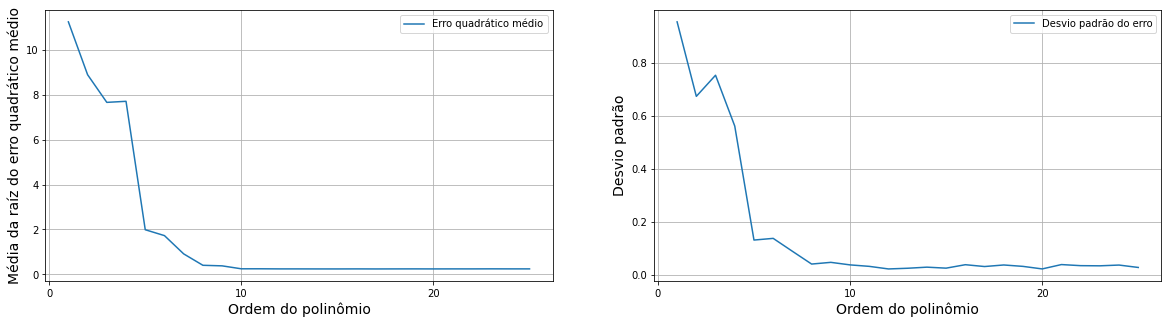

In [ ]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(degrees, mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média da raíz do erro quadrático médio', fontsize=14)
plt.xticks(range(0, len(degrees)+2, 10))
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(degrees, std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, len(degrees)+2, 10))
plt.legend()
plt.grid()

#Show the plot.
plt.show()

# Leave-one-out cross-validation

In [ ]:
# Instantiate the LOOCV object.
loocv = LeaveOneOut()

include_bias = True
mean_vec = []
std_vec = []
for d in degrees:
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    lin_scores = cross_val_score(poly_reg, X, y, scoring='neg_mean_squared_error', cv=loocv)
        
    scores = -lin_scores
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

In [ ]:
for d in range(0, len(degrees)):
    print('degree: %d - error: %1.2f - std: %1.2f' % (degrees[d], mean_vec[d], std_vec[d]) )

degree: 1 - error: 11.26 - std: 10.29
degree: 2 - error: 8.87 - std: 9.98
degree: 3 - error: 7.67 - std: 7.34
degree: 4 - error: 7.69 - std: 7.38
degree: 5 - error: 1.98 - std: 1.97
degree: 6 - error: 1.73 - std: 2.18
degree: 7 - error: 0.92 - std: 0.99
degree: 8 - error: 0.40 - std: 0.57
degree: 9 - error: 0.38 - std: 0.52
degree: 10 - error: 0.25 - std: 0.36
degree: 11 - error: 0.25 - std: 0.36
degree: 12 - error: 0.24 - std: 0.35
degree: 13 - error: 0.24 - std: 0.35
degree: 14 - error: 0.24 - std: 0.35
degree: 15 - error: 0.24 - std: 0.35
degree: 16 - error: 0.24 - std: 0.35
degree: 17 - error: 0.24 - std: 0.35
degree: 18 - error: 0.24 - std: 0.35
degree: 19 - error: 0.24 - std: 0.35
degree: 20 - error: 0.24 - std: 0.35
degree: 21 - error: 0.24 - std: 0.35
degree: 22 - error: 0.24 - std: 0.35
degree: 23 - error: 0.24 - std: 0.35
degree: 24 - error: 0.24 - std: 0.35
degree: 25 - error: 0.24 - std: 0.35


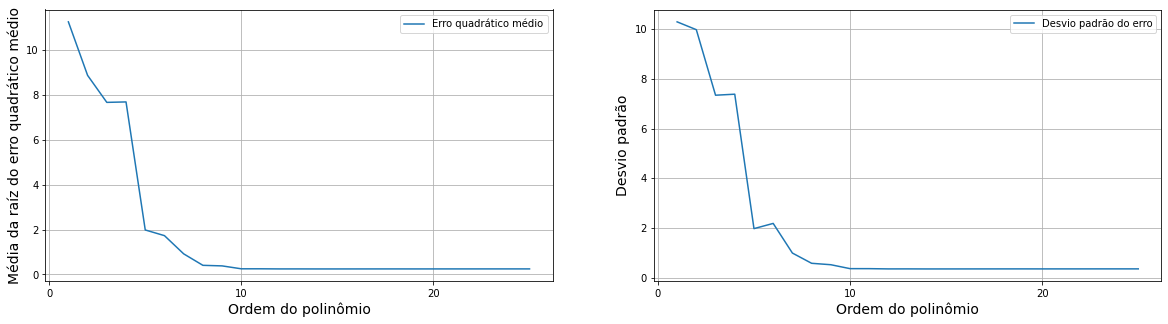

In [ ]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(degrees, mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média da raíz do erro quadrático médio', fontsize=14)
plt.xticks(range(0, len(degrees)+2, 10))
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(degrees, std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, len(degrees)+2, 10))
plt.legend()
plt.grid()

#Show the plot.
plt.show()

# Learning Curves

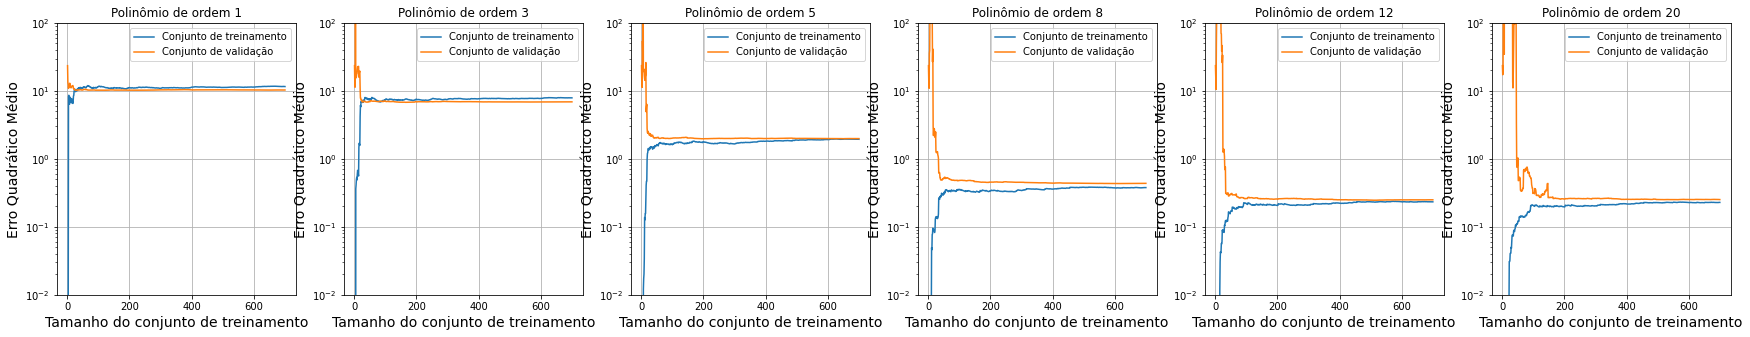

In [ ]:
# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

degrees = [1, 3, 5, 8, 12, 20]

include_bias = True

plt.figure(figsize=(30, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        poly_reg.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = poly_reg.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = poly_reg.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), error_training, label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), error_validation, label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.ylim([1e-2, 100])
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    
#Show the plot.
plt.show()

# Compare model against noisy data

[[0.         1.18107931]]
[0.01321603]
------------------------------
[[  0.           5.33114187 -19.99214416  16.59298868]]
[0.01321603]
------------------------------
[[    0.           -62.27037587   470.23483793 -1228.69356174
   1319.5679306   -497.79440451]]
[0.01321603]
------------------------------
[[ 0.00000000e+00  3.07259434e+01 -1.16191177e+03  9.59877614e+03
  -3.46231890e+04  6.53670311e+04 -6.77162173e+04  3.66055596e+04
  -8.09947289e+03]]
[0.01321603]
------------------------------
[[ 0.00000000e+00 -1.85052016e+01 -8.43347207e+01  2.03292964e+03
  -2.55510060e+04  2.11115862e+05 -9.81314494e+05  2.68998543e+06
  -4.57051994e+06  4.89280739e+06 -3.22178213e+06  1.19454822e+06
  -1.91218140e+05]]
[0.01321603]
------------------------------
[[ 0.00000000e+00 -3.57596264e+01  7.17181329e+02 -1.02607002e+04
   2.38154557e+04  7.94077246e+05 -7.84023592e+06  1.09384685e+07
   3.14192065e+08 -3.08152221e+09  1.58273581e+10 -5.44145969e+10
   1.34921983e+11 -2.48832608e+11 

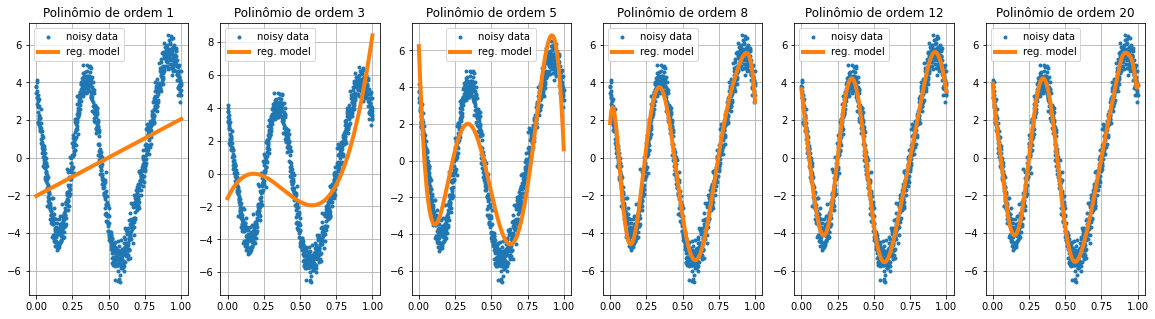

In [ ]:
X_test = np.linspace(0.0,1.0,1000).reshape(1000,1)

degrees = [1, 3, 5, 8, 12, 20]

include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    preg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    preg.fit(X, y)
    
    print(preg.named_steps['reg'].coef_)
    print(preg.named_steps['reg'].intercept_)
    print('------------------------------')

    # Use the trained model for prediction of the training set.
    y_pred = preg.predict(X_test)
    
    plt.plot(X,y,'.',label='noisy data')
    plt.plot(X,y_pred,linewidth=4,label='reg. model')
    plt.grid()
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    
plt.show()

# Best degree

In [ ]:
# Instantiate a polynomial.
poly = PolynomialFeatures(degree=12, include_bias=True)
# Instantiate a scaler.
scaler = StandardScaler()
# Instantiate a linear regressor.
reg = LinearRegression()

# Create a pipeline of actions.
poly_reg = Pipeline([
    ("poly", poly),
    ("scaler", scaler),
    ("reg", reg),
])

# Perform polynomial regression.
poly_reg.fit(X, y)

# Use the trained model for prediction of the training set.
y_pred = poly_reg.predict(X)

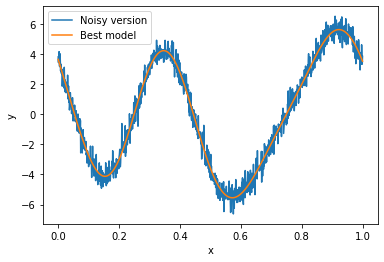

In [ ]:
plt.plot(X,y, label='Noisy version')
plt.plot(X,y_pred, label='Best model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()